In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import acquire

In [2]:
df = acquire.get_telco_data()

In [3]:
df.shape

(7043, 24)

In [4]:
# drop any duplicates
df.drop_duplicates(inplace=True)
    
    # fill any empty spaces with np.nan
df.replace(' ', np.nan, inplace=True)
    
    # drop rows that contain null values, they are a small percentage
df.dropna(axis=0, inplace=True)
    
    # convert total_charges to a numeric data type
df = df.astype({'total_charges': 'float64'})

    # No computations will be done on 'customer_id' that column will become the index.
df.set_index('customer_id', drop=True, inplace=True)

In [5]:
df.head(5)

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
customer_id,,,,,,,,,,,,,,,,,,,,,
2794-XIMMO,1,1,2,Male,0,Yes,No,53,No,No phone service,...,Yes,Yes,Yes,Yes,60.45,3184.25,Yes,One year,Electronic check,DSL
2851-STERV,1,1,2,Male,1,No,No,35,Yes,No,...,Yes,Yes,Yes,Yes,73.00,2471.25,No,One year,Electronic check,DSL
2898-LSJGD,1,1,2,Female,0,Yes,Yes,21,No,No phone service,...,No,Yes,Yes,Yes,55.95,1157.05,Yes,One year,Electronic check,DSL
2969-WGHQO,1,1,2,Female,0,Yes,Yes,7,Yes,No,...,No,Yes,No,No,69.45,477.05,No,One year,Electronic check,DSL
2988-PLAHS,1,1,2,Female,0,No,No,3,Yes,No,...,No,Yes,Yes,Yes,69.95,220.45,No,One year,Electronic check,DSL


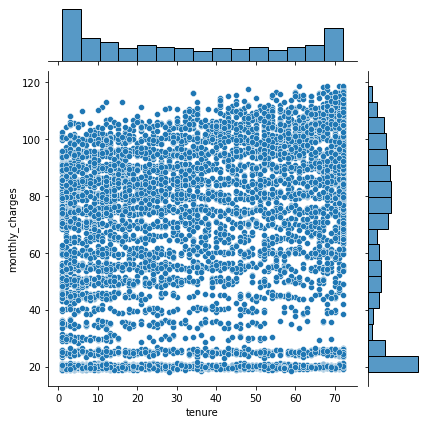

In [9]:
sns.jointplot(data=df, x="tenure", y="monthly_charges")

In [ ]:
sns.displot(x = 'tenure', data=df)
plt.title('tenure in months')
plt.show()

In [ ]:
sns.displot(x = 'monthly_charges', data=df)
plt.title('monthly_charges')
plt.show()